# Matplotlib basics 

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib. It is almost completely adapted from probably one of the most beautiful pieces of documentation out there, that is the [Quick start guide of Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html).


Let us first import `matplotlib.pyplot` with its usual alias `plt`, along with `numpy`, which will come in handy:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on `Figure`s (e.g., windows, Jupyter
widgets, etc.), each of which can contain one or more `Axes`, an
area where points can be specified in terms of x-y coordinates. The simplest way of
creating a Figure with an Axes is using `plt.subplots()`.

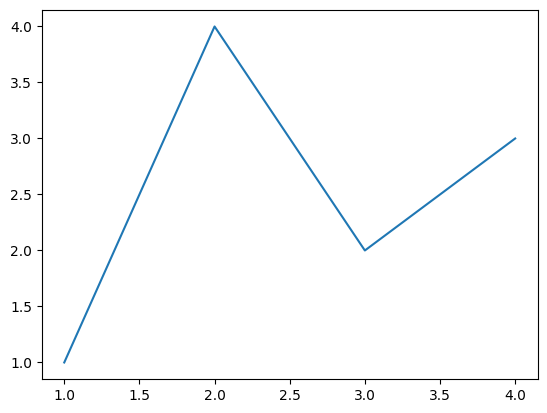

In [4]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]); # Plot some data on the Axes.

When outside of an interactive environment such as Jupyter, you'll need to call `fig.show()` to see the figure.

## Parts of a Figure

Here are the components of a Matplotlib Figure.

![](img/anatomy.png)


### [`Figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)

The **whole** figure.  The Figure keeps
track of all the child `Axes`, a group of
'special' `Artists` (titles, figure legends, colorbars, etc.), and
even nested subfigures.

Typically, you'll create a new Figure through one of the following
functions
```python
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                                ['left', 'right_bottom']])
```

`plt.subplots()` and `plt.subplot_mosaic()` are convenience functions
that additionally create Axes objects inside the Figure, but you can also
manually add Axes later on.

All of these functions accept a `figsize` argument, that specifies in a tuple the `(width, height)` of the figure.

Figures may be saved using `fig.savefig()`. For instance, to save the previous figure, you can run:

In [6]:
fig.savefig("figure.pdf")

Common save formats are `.png`, `.jpg` or `.pdf`. 


### [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes)

An Axes is an Artist attached to a Figure that contains a region for
plotting data, and usually includes two (or three in the case of 3D)
[`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects (be aware of the difference
between **Axes** and **Axis**) that provide ticks and tick labels to
provide scales for the data in the Axes. Each `Axes` also
has a title
(set via `Axes.set_title()`), an x-label (set via
`Axes.set_xlabel()`), and a y-label (set via
`Axes.set_ylabel()`).

The `Axes` methods are the primary interface for configuring
most parts of your plot (adding data, controlling axis scales and
limits, adding labels etc.).

### [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

These objects set the scale and limits and generate ticks (the marks
on the Axis) and ticklabels (strings labeling the ticks).  The location
of the ticks is determined by a `matplotlib.ticker.Locator` object and the
ticklabel strings are formatted by a `matplotlib.ticker.Formatter`.  The
combination of the correct `.Locator` and `.Formatter` gives very fine
control over the tick locations and labels.


### [`Artist`](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)

Basically, everything visible on the Figure is an Artist (even
`Figure`, `Axes`, and `Axis` objects).  This includes
`Text` objects, `Line2D` objects, `collections` objects, `Patch`
objects, etc. When the Figure is rendered, all of the
Artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.

### A note on coding style

This guide will only present the explicit (or "object-oriented") way to create Figures and Axes. Why? First, because this will allow you to properly understand what we do here, like where we're actually drawing stuff. Second, this will enable you to make more complex plots in the future, which is sometimes simply not possible when you go down the implicit way.

## Types of inputs to plotting functions

Plotting functions expect an `np.array` as
input, or objects that can be converted to an array (via `np.asarray()`), such as lists.

So for instance, to draw the function `x**2` over the interval `[0, 2]`, you can simply write:

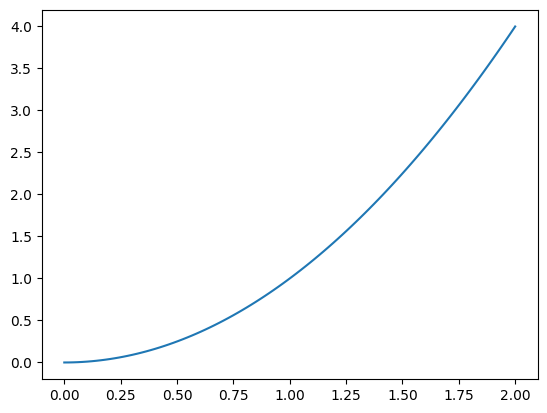

In [31]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, x**2);

Most methods will also parse a string-indexable object like a `dict`, or a `polars.DataFrame`.  Matplotlib allows you to provide the ``data`` keyword argument and generate plots passing the strings corresponding to the `x` and `y` variables.

We can thus reproduce the plot shown above using a dictionary as input:

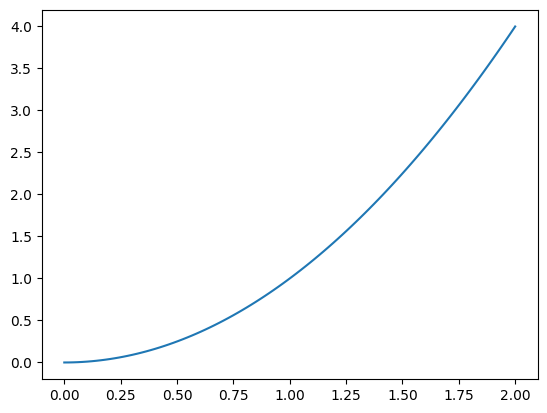

In [5]:
data = {'x': x, 'x_squared': x ** 2}

fig, ax = plt.subplots()
ax.plot('x', 'x_squared', data=data);

## Plot types

Matplotlib allows you to generate plots of [many different kinds](https://matplotlib.org/stable/plot_types/index.html). Here we'll show just two additional ones, as they can be very useful. 

You can make a bar plot using `Axes.bar()`, to show for instance the number of occurences of elements in an array. To get the latter, we use the `np.unique()` function, passing `return_counts=True` to get the frequency count of unique values in a NumPy array.

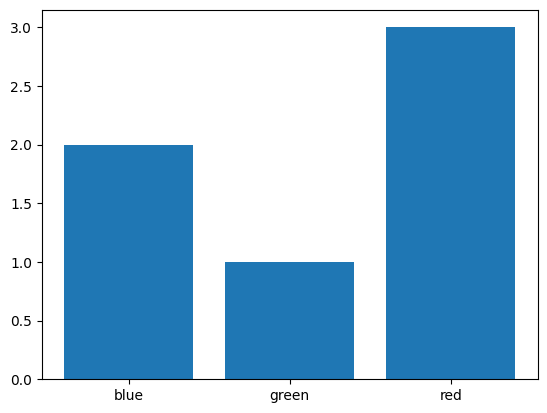

In [7]:
colors = np.array(['red', 'green', 'blue', 'red', 'red', 'blue'])
unique_colors, count = np.unique(colors, return_counts=True)

fig, ax = plt.subplots()
ax.bar(unique_colors, count);

To quickly plot a distribution, you can use `Axes.hist()`, it will bin your data and the height of each bin, giving you some control over the binning with parameters such as `bin`, for you to pass the number of bins, and `density`, to normalise the frequencies:

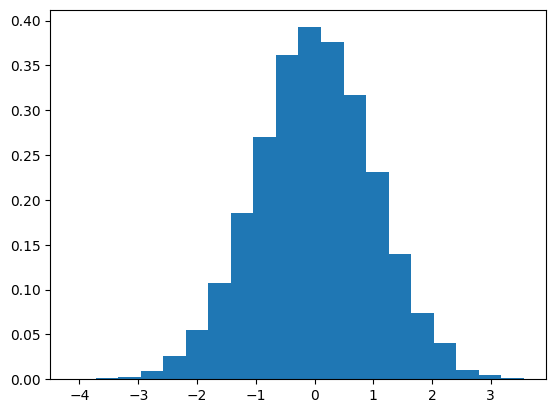

In [62]:
data = np.random.randn(10000)

fig, ax = plt.subplots()
counts, bin_edges, bar = ax.hist(data, bins=20, density=True)

To have more control, or simply plot the distribution in a different form than with bars, you may perform these preliminary computations yourself using `np.histogram()`:

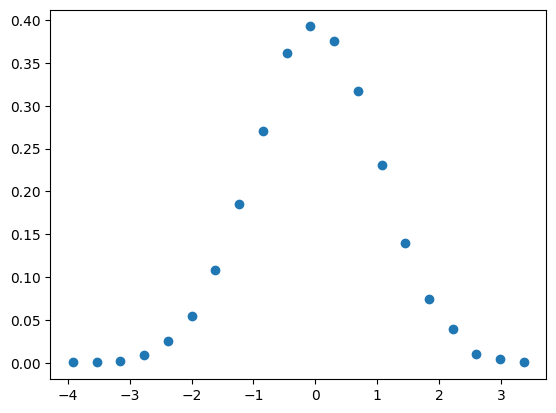

In [63]:
counts, bin_edges = np.histogram(data, bins=20, density=True)

fig, ax = plt.subplots()
ax.scatter((bin_edges[1:] + bin_edges[:-1]) / 2, counts);

## Labelling plots

### Axes labels and text

`Axes.set_xlabel()`, `Axes.set_ylabel()`, and `Axes.set_title()` are used to
add text in the indicated locations. Text can also be directly added to plots using
`Axes.text()`:

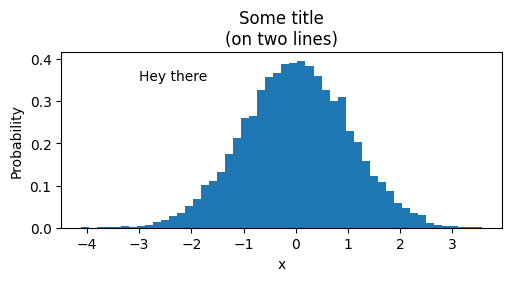

In [64]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(data, 50, density=True)

ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Some title\n(on two lines)')
ax.text(-3, .35, "Hey there");

```{important}
**Any** figure you present to someone else should feature axis labels!
```

### Legends

Often we want to identify lines or markers with a `Axes.legend()`:

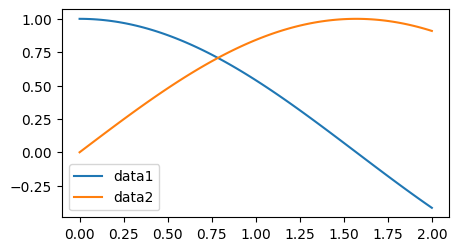

In [68]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, np.cos(x), label='data1')
ax.plot(x, np.sin(x), label='data2')
ax.legend();

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent. They are discussed in detail in
`legend_guide`.

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing
to *xy*, to a piece of text at *xytext*:


(-2.0, 2.0)

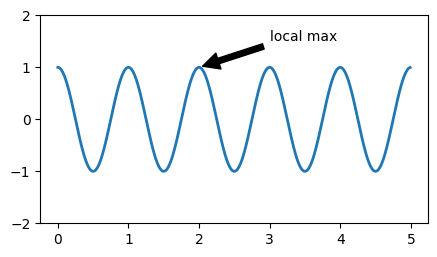

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both *xy* and *xytext* are in data coordinates.
There are a variety of other coordinate systems one can choose -- see
[annotations-tutorial](https://matplotlib.org/stable/users/explain/text/annotations.html).

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\int_{0}^{\infty } x^2 dx$ in the title,
you can write a TeX expression surrounded by dollar signs:

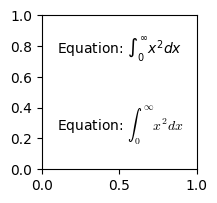

In [79]:
fig, ax = plt.subplots(figsize=(2, 2))
text = r"Equation: $\int_{0}^{\infty } x^2 dx$"
ax.text(0.1, 0.75, text)
ax.text(0.1, 0.25, text, math_fontfamily='cm');

where the ``r`` preceding the title string signifies that the string is a
*raw* string and not to treat backslashes `\`, which are common in LaTeX, as Python escapes. Note the use of the `math_fontfamily` argument, which allows you to set the font only for maths expressions.

## Styling Artists

Most plotting methods have styling options for the Artists, accessible either
when a plotting method is called, or from a "setter" on the Artist. 

In the plot below we manually set the color of the
Artists created by the first `Axes.plot()`, and we set the color of the second line
after the fact with `Line2D.set()`.

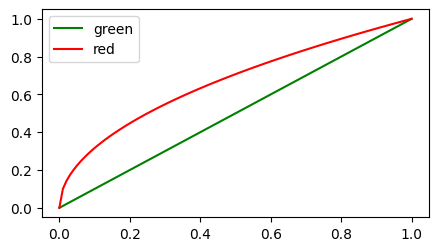

In [82]:
fig, ax = plt.subplots(figsize=(5, 2.7))

x = np.linspace(0, 1, 100)
ax.plot(x, x, color="green", label="green")
(line,) = ax.plot(x, np.sqrt(x))
line.set(color="red", label="red")
ax.legend();

See how the legend automatically represents the line in the right style? And how you can set the label for an Artist directly in `.set()`? Pretty neat, right?

```{tip}
To find out what type of Artist a specific method is generating, head over to the method's documentation (one of [these](https://matplotlib.org/stable/api/axes_api.html#plotting)), like here [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot), and find out what it Returns (here, a list of [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)).
Then, you may discover what styling options you have on this Artist, by inspecting the class' documentation, in particular the [`set` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set).
```

```{admonition} Question
Once you have the `line` object above, how else can you find out what styling options its `set` method provides you?
```

```{admonition} Answer
:class: tip dropdown
You may use either `line.set?` or help(line.set). Try it!
```

### Colors

Matplotlib has a very flexible array of colors that are accepted for most
Artists; see [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html) for a list of specifications. You may also direclty set the opacity of Artists using the `alpha` argument.

Some Artists will take multiple colors.  For instance, for
a `Axes.scatter()` plot, the edge of the markers can be different colors
from the interior:

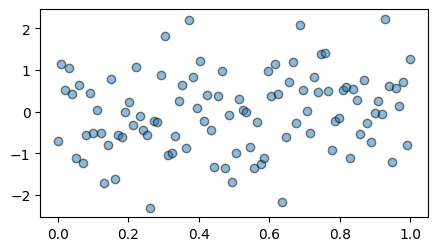

In [99]:
fig, ax = plt.subplots(figsize=(5, 2.7))

data = np.random.randn(100)
ax.scatter(x, data, alpha=0.5, facecolor='C0', edgecolor='k');

### Marker and linestyles

There is an array of markerstyles available as string codes, or you can even define your own `MarkerStyle` (see the [marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)).

Similarly, stroked lines can have a linestyle.  See the [linestyle gallery](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Here below we plot the cosine function with a dashed line, and the sine with round markers, and no line:

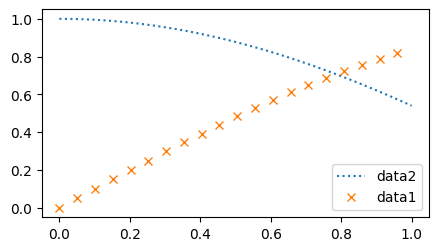

In [92]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, np.cos(x), linestyle=':', label='data2')
ax.plot(x[::5], np.sin(x[::5]), marker='x', linestyle='', label='data1')
ax.legend();

```{note}
Note how we sliced our two input arrays in the second `ax.plot()` call in order to plot a subset of points.
```

### Sizes

In Matplotlib, most sizes are specified in typographic points (pt). This is the same unit you see in a text editor when selecting a font size. The most notable exception is the size of Figures: `figsize` specifies the `(width, height)` in inches. To give you an idea, $x$ centimeters correspond to $x / 2.54$ inches, that is, 1 inch is equal to 2.54 cm.

Line widths can be set for Artists that have stroked lines.  Marker size depends on the method being used.  `Axes.plot` specifies
markersize in points, and is generally the "diameter" or width of the
marker.  `Axes.scatter` specifies markersize as approximately
proportional to the visual area of the marker.

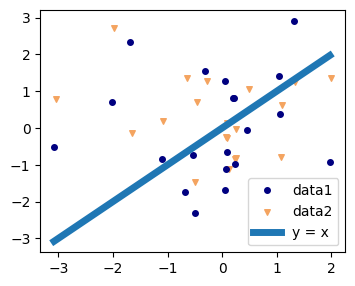

In [131]:
# Create a figure 10cm wide and 8cm high.
x = np.random.randn(20)
data1 = np.random.randn(20)
data2 = np.random.randn(20)
line_coords = [np.min(x), np.max(x)]

fig, ax = plt.subplots(figsize=(10 / 2.54, 8 / 2.54))
ax.plot(x, data1, 'o', color='navy', markersize=4, label='data1')
ax.scatter(x + 0.03, data2, color='sandybrown',  marker='v', s=4**2., label='data2')
ax.plot(line_coords, line_coords, linewidth=5, label='y = x')
ax.legend();

### Text

All of the `Axes.text()` functions return a `matplotlib.text.Text`
instance.  Just as with lines above, you can customize the properties by
passing keyword arguments into the text functions::

```python
ax.set_xlabel('my data', fontsize=14, color='red')
```

